<img src="https://www.uc.cl/site/templates/dist/images/logo-uc-wh.svg" alt="drawing" width="200"/>


#FACULTAD DE AGRONOMÍA E INGENIERÍA FORESTAL
#Asignatura: Mercados Agricolas
###Profesor: Sebastian Becerra
### Ayudante: Sebastian Castillo

#Trabajo Práctico 1

En este laboratorio se examinaran los principales índices mundiales de commodities, extraidos de la página web del Fondo Monetario Internacional.

Para una descripción de la base de datos ver [aqui](https://www.imf.org/en/Research/commodity-prices)

La finalidad de este laboratorio es realizar un análisis estadístico de estos índices y familiarizarse con ***python-colab***. 

##Instalar requirimientos previos para poder trabajar.

***pip*** en python es un sistema de gestión de paquetes utilizado para instalar y administrar estos paquetes de software escritos en Python y descargarlos a nuestra computadora con la finalidad de integrarlos a nuestros desarrollos realizado en python.

Se instalan los complementos 'xlrd' y pandas para poder leer archivos excel y trabajar con estructuras de datos respectivamente.

Para más detalle ver [aqui](https://pandas.pydata.org/)

In [1]:
!pip install --upgrade xlrd -q
!pip install --upgrade pandas -q

     |████████████████████████████████| 96 kB 1.0 MB/s 


Para activar los paquetes descargados se utiliza ```import```. Una vez hecho eso, se puede trabajar con los comandos respectivos de cada libreria.

#```Actividad Propuesta 1: Revisar documentación de las librerias instaladas y revisar de manera general para que sirve cada una```.

In [2]:
# Importacion Librerias
import pandas as pd
import pandas_profiling
from functools import reduce
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

##Paso 1. 
Descargar la base de datos directamente desde la pagina del FMI [clic aqui](https://www.imf.org/en/Research/commodity-prices).

* Obtener la dirección de descarga y usar el comando ```wget```
* La extension ```-O``` permite dar el nombre al archivo descargado.



In [ ]:
!wget "https://www.imf.org/-/media/Files/Research/CommodityPrices/Monthly/external-dataaugust.ashx"

In [3]:
#descarga de la base de datos
!wget "https://www.imf.org/-/media/Files/Research/CommodityPrices/Monthly/external-dataaugust.ashx" -O data.xls

--2022-08-29 15:49:29--  https://www.imf.org/-/media/Files/Research/CommodityPrices/Monthly/external-dataaugust.ashx
Resolving www.imf.org (www.imf.org)... 104.116.243.98, 104.116.243.112, 2600:1417:76::172e:3f23, ...
Connecting to www.imf.org (www.imf.org)|104.116.243.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 661504 (646K) [application/vnd.ms-excel]
Saving to: ‘data.xls’

data.xls            100%[===================>] 646.00K  --.-KB/s    in 0.02s   

2022-08-29 15:49:33 (34.3 MB/s) - ‘data.xls’ saved [661504/661504]



##Paso 2. 
* Revisar sí se descargó la base de datos (carpeta a la izquierda).
* Obtener la ruta para cargar la base de datos. Sobre el archivo excel a la izquierda, pinchar los tres puntos y copiar el path (ruta).
* Usar ```pd.read_excel``` de la libreria ```pandas``` para cargar la base de datos como un ```dataframe```.
* usar ```head``` para dar una inspeccion a la base de datos.


In [5]:
#cargar la base de datos
pd.set_option('display.max_columns', None)
data = pd.read_excel('/content/data.xls')
data.head(5)

,Commodity,PALLFNF,PEXGALL,PNFUEL,PFANDB,PFOOD,PBEVE,PINDU,PAGRI,PRAWM,PALLMETA,PMETA,PPMETA,PEXGMETA,PFERT,PNRG,POILAPSP,PNGAS,PCOAL,PALUM,PBANSOP,PBARL,PBEEF,PCOALAU,PCOALSA_USD,PCOCO,PCOFFOTM,PCOFFROB,PROIL,PCOPP,PCOTTIND,PFSHMEAL,PGNUTS,PHIDE,PIORECR,PLAMB,PLEAD,PLOGORE,PLOGSK,PMAIZMT,PNGASEU,PNGASJP,PNGASUS,PNICK,POILAPSP.1,POILBRE,POILDUB,POILWTI,POLVOIL,PORANG,PPOIL,PPORK,PPOULT,PRICENPQ,PRUBB,PSALM,PSAWMAL,PSAWORE,PSHRI,PSMEA,PSOIL,PSOYB,PSUGAISA,PSUGAUSA,PSUNO,PTEA,PTIN,PURAN,PWHEAMT,POATS,PSORG,PWOOLC,PWOOLF,PZINC,PLMMODY,PCOBA,PGOLD,PSILVER,PPALLA,PPLAT,PPROPANE,PUREA,PPOTASH,PDAP,PTOMATO,PMILK,PCHANA,PAPPLE,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94
0,Commodity.Description,"All Commodity Price Index, 2016 = 100, include...","Commodities for Index: All, excluding Gold, 20...","Non-Fuel Price Index, 2016 = 100, includes Pre...","Food and Beverage Price Index, 2016 = 100, inc...","Food Price Index, 2016 = 100, includes Cereal,...","Beverage Price Index, 2016 = 100, includes Cof...","Industrial Inputs Price Index, 2016 = 100, inc...","Agriculture Price Index, 2016 = 100, includes ...","Agricultural Raw Materials Index, 2016 = 100, ...","All Metals Index, 2016 = 100: includes Metal P...","Base Metals Price Index, 2016 = 100, includes ...","Precious Metals Price Index, 2016 = 100, inclu...","All Metals EX GOLD Index, 2016 = 100: includes...","Fertilizer Index, 2016 = 100, includes DAP, Po...","Fuel (Energy) Index, 2016 = 100, includes Crud...","Crude Oil (petroleum), Price index, 2016 = 100...","Natural Gas Price Index, 2016 = 100, includes ...","Coal Price Index, 2016 = 100, includes Austral...","Aluminum, 99.5% minimum purity, LME spot price...","Bananas, Central American and Ecuador, FOB U.S...","Barley, Canadian no.1 Western Barley, spot pri...","Beef, Australian and New Zealand 85% lean fore...","Coal, Australian thermal coal, 12,000- btu/pou...","Coal, South African export price, US$ per metr...","Cocoa beans, International Cocoa Organization ...","Coffee, Other Mild Arabicas, International Cof...","Coffee, Robusta, International Coffee Organiza...","Rapeseed oil, crude, fob Rotterdam, US$ per me...","Copper, grade A cathode, LME spot price, CIF E...","Cotton, Cotton Outlook 'A Index', Middling 1-3...","Fishmeal, Peru Fish meal/pellets 65% protein, ...","Groundnuts (peanuts), 40/50 (40 to 50 count pe...","Hides, Heavy native steers, over 53 pounds, wh...",China import Iron Ore Fines 62% FE spot (CFR T...,"Lamb, frozen carcass Smithfield London, US cen...","Lead, 99.97% pure, LME spot price, CIF Europea...","Soft Logs, Average Export price from the U.S. ...","Hard Logs, Best quality Malaysian meranti, imp...","Maize (corn), U.S. No.2 Yellow, FOB Gulf of Me...","Natural Gas, Netherlands TTF Natural Gas Forwa...","Natural Gas, Indonesian Liquefied Natural Gas ...","Natural Gas, Natural Gas spot price at the Hen...","Nickel, melting grade, LME spot price, CIF Eur...","Crude Oil (petroleum), Price index, 2016 = 100...","Crude Oil (petroleum), Dated Brent, light ble...","Crude Oil (petroleum), Dubai Fateh Fateh 32 AP...","Crude Oil (petroleum), West Texas Intermediate...","Olive Oil, extra virgin less than 1% free fatt...","Generic 1st 'JO' Future, USD/lb","Palm oil, Malaysia Palm Oil Futures (first con...","Swine (pork), 51-52% lean Hogs, U.S. price, US...","Poultry (chicken), Whole bird spot price, Read...","Rice, 5 percent broken milled white rice, Thai...","Rubber, Singapore Commodity Exchange, No. 3 Ru...","Fish (salmon), Farm Bred Norwegian Salmon, exp...","Hard Sawnwood, Dark Red Meranti, select and be...","Soft Sawnwood, average export price of Douglas...",Thailand Whiteleg Shrimp 70 Shrimps/Kg Spot Price,"Soybean Meal, Chicago Soybean Meal Futures (fi...","Soybean Oil, Chicago Soybean Oil Futures (firs...","Soybeans, U.S. soybeans, Chicago Soybean futur...","Sugar, Free Market, Coffee Sugar and Cocoa Exc...","Sugar, U.S. import price, contract no.14 neare...","Sunflower o

##Paso 3:

* Inspeccionar la base de datos.
* Arriba esta el codigo de cada indice descagado. 
* La fila 0 tiene la descripción de cada serie.
* Para mas adelante seleccionaremos: **All Commodity Price Index (PALLFNF)**, **Food Price Index (PFOOD)**, **Industrial Inputs Price Index (PINDU)**, **Agricultural Raw Materials Index (PRAWM)**, **All Metals Index (PALLMETA)** y **Fuel (Energy) Index (PNRG)**.

#```Actividad Propuesta 2: Revisar y explorar la definicion que entrega el FMI para cada indice. ¿Existe otro indice de la base de datos que podria ser util? ¿Por qué?```.

##Paso 4. 

* Al observar la base de datos se aprecia que existen 3 filas con información poco útil.

Remover:

*   Fila 0: Descripción del índice.
*   Fila 1: Tipo de dato (índice, USD, etc)
*   Fila 2: Descripción de la frecuencia de las series.

Para esto usar ```drop``` de pandas eliminando la fila 0, fila 1 y fila 2. ```Pandas``` exige poner como index hasta la fila que se requiere, es decir la tres.

In [6]:
#Elimina fila 0, 1 y 2
data.drop(data.index[0:3], axis=0, inplace=True)

##Paso 5

* Inspeccionar la base de datos.
* Crear una variable para la fecha.
* Dejar la base de datos solo con la fecha y los indices propuestos en el Paso 3.
* Renombrar las series como: ```Total, Alimentos, Industrial, Agro, Metales y Energia ```.
* Eliminar los NaN.
* Guardar la base de datos procesada en un archivo ```CSV```.

In [7]:
data

,Commodity,PALLFNF,PEXGALL,PNFUEL,PFANDB,PFOOD,PBEVE,PINDU,PAGRI,PRAWM,PALLMETA,PMETA,PPMETA,PEXGMETA,PFERT,PNRG,POILAPSP,PNGAS,PCOAL,PALUM,PBANSOP,PBARL,PBEEF,PCOALAU,PCOALSA_USD,PCOCO,PCOFFOTM,PCOFFROB,PROIL,PCOPP,PCOTTIND,PFSHMEAL,PGNUTS,PHIDE,PIORECR,PLAMB,PLEAD,PLOGORE,PLOGSK,PMAIZMT,PNGASEU,PNGASJP,PNGASUS,PNICK,POILAPSP.1,POILBRE,POILDUB,POILWTI,POLVOIL,PORANG,PPOIL,PPORK,PPOULT,PRICENPQ,PRUBB,PSALM,PSAWMAL,PSAWORE,PSHRI,PSMEA,PSOIL,PSOYB,PSUGAISA,PSUGAUSA,PSUNO,PTEA,PTIN,PURAN,PWHEAMT,POATS,PSORG,PWOOLC,PWOOLF,PZINC,PLMMODY,PCOBA,PGOLD,PSILVER,PPALLA,PPLAT,PPROPANE,PUREA,PPOTASH,PDAP,PTOMATO,PMILK,PCHANA,PAPPLE,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94
3,1990M1,NaN,NaN,NaN,NaN,NaN,50.350289,NaN,NaN,72.922947,NaN,NaN,33.097764,NaN,NaN,NaN,NaN,NaN,51.172528,1528,589.7,75.568672,126.309998,38,31,995,75.829987,50.52,440.95,2365.556991,75.200012,652.05913,864.35,92.700012,14.05,111.899986,707,121.556919,156.039993,105.900513,1.73,NaN,NaN,7056,20.425217,20.98913,17.501739,22.784783,2972.682,1.913636,230.555951,93.147106,47.831425,276,37.73,5.204495,555.92395,203.779663,4.693144,191.306128,418.657338,209.827483,14.200001,23.049999,588.036232,252.929993,6592.000165,9,167.918579,1.432065,4.62,501.128824,1074.03723,1294,NaN,7630.000114,409.819061,5.247545,135.413043,497.656522,NaN,124.055556,NaN,148,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990M2,NaN,NaN,NaN,NaN,NaN,51.117834,NaN,NaN,73.517506,NaN,NaN,33.701146,NaN,NaN,NaN,NaN,NaN,51.172528,1454,644.9,73.864701,111.459991,38,31,1022,84.01001,51.299999,422.29,2358.9434,75.959991,670.16885,823.75,92.679993,14.05,116.170013,779,121.30828,153.100006,106.294167,1.73,NaN,NaN,6977,19.388333,19.7025,16.6815,21.781,3052.71,1.940289,223.945027,80.003995,48.595273,300,38.68,5.646819,569.147095,203.733047,5.016807,182.267175,438.71938,208.449456,14.650002,22.880001,608.475,211.289993,6156.099937,8.8,160.937271,1.375875,4.57,494.864714,1061.996454,1394,NaN,7659.999847,417.181061,5.28935,135.4375,516.1,NaN,125.6,NaN,145.8,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1990M3,NaN,NaN,NaN,NaN,NaN,55.749862,NaN,NaN,74.241924,NaN,NaN,31.811295,NaN,NaN,NaN,NaN,NaN,51.172528,1567,538.5,70.044579,112.670013,38,31,1131,93.959991,57.68,412.77,2625.702723,78.899994,641.984523,795.91,95.410004,14.05,114.079987,1059,128.017488,145.550003,109.837318,1.73,NaN,NaN,9267,18.103788,18.465909,15.755909,20.089545,2925.144,1.922636,236.340509,79.910116,50.341211,289,37.580002,5.610611,566.256287,206.016953,5.124695,184.328497,487.22102,218.279378,15.310001,23.580002,618.075758,192.600006,6270.500258,8.8,156.52803,1.464205,4.69,488.600604,1064.404609,1666,NaN,8029.998779,392.703339,5.076886,130.281818,497.063636,NaN,122.5,NaN,160.909091,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1990M4,NaN,NaN,NaN,NaN,NaN,57.600808,NaN,NaN,76.095284,NaN,NaN,30.422053,NaN,NaN,NaN,NaN,NaN,51.172528,1526,584.2,68.769082,112.129997,38,31,1336,93.730011,57.389999,428.8,2685.226891,82.869995,647.403119,761.43,100,14.05,121.109993,835,127.257046,145.139999,118.498337,2.11,NaN,NaN,8939,16.368095,16.92619,14.250476,17.927619,2945.97,1.960125,220.639566,99.643558,49.068131,276,38.009998,5.631545,549.913818,218.762711,5.286531,191.063619,498.24412,220.667957,15.240002,23.790001,609.507937,194.809998,6390.900579,8.65,159.467529,1.550595,4.98,482.336493,1071.629075,1686,NaN,8229.999542,374.292114,5.059,126.959524,478.147619,NaN,120.47619,NaN,175.619048,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1990M5,NaN,NaN,NaN,NaN,NaN,57.177569,NaN,NaN,75.491771,NaN,NaN,30.077283,NaN,NaN,NaN,NaN,NaN,54.120417,1527,494.4,71.026076,112.48999,40.5,32.5,1443,92.019989,55.029999,444.77,2740.342391,85.600006,663.067609,768.48,99.459991,14.05,122.519989,825,130.367009,155.669998,121.254097,2.11,NaN,NaN,8698,16.349855,16.671739,14.647826,17.73,3021.102,1.949477,232.208681,115.678154,49.031758,260,38.75,5.798833,491.881866,212.995758,5.394418,199.970295,526.90418,228.316003,14.619999,23.59,621.768116,187.020004,6324.600508,9.35,14

In [9]:
#Para crear la fecha obtenemos la primera y ultima observacion de la columna comodity
print(data['Commodity'].iloc[0])
print(data['Commodity'].iloc[-1])

1990M1
2022M7


In [10]:
#selccinanamos los indices propuestos
data=data[['PALLFNF', 'PFOOD', 'PINDU', 'PRAWM', 'PALLMETA','PNRG']]
data

,PALLFNF,PFOOD,PINDU,PRAWM,PALLMETA,PNRG
3,NaN,NaN,NaN,72.922947,NaN,NaN
4,NaN,NaN,NaN,73.517506,NaN,NaN
5,NaN,NaN,NaN,74.241924,NaN,NaN
6,NaN,NaN,NaN,76.095284,NaN,NaN
7,NaN,NaN,NaN,75.491771,NaN,NaN
...,...,...,...,...,...,...
389,238.59947,157.585186,201.640915,121.667593,196.313266,332.735242
390,226.712904,161.733294,200.964126,124.301289,194.044295,301.119736
391,224.726856,158.765685,184.561975,125.378195,178.515934,307.349853
392,230.226432,152.82431,178.116744,122.401589,173.81235,328.825121


In [11]:
#cambiamos los nombres
data.columns = ['Total','Alimentos','Industrial','Agro','Metales','Energia']
data

,Total,Alimentos,Industrial,Agro,Metales,Energia
3,NaN,NaN,NaN,72.922947,NaN,NaN
4,NaN,NaN,NaN,73.517506,NaN,NaN
5,NaN,NaN,NaN,74.241924,NaN,NaN
6,NaN,NaN,NaN,76.095284,NaN,NaN
7,NaN,NaN,NaN,75.491771,NaN,NaN
...,...,...,...,...,...,...
389,238.59947,157.585186,201.640915,121.667593,196.313266,332.735242
390,226.712904,161.733294,200.964126,124.301289,194.044295,301.119736
391,224.726856,158.765685,184.561975,125.378195,178.515934,307.349853
392,230.226432,152.82431,178.116744,122.401589,173.81235,328.825121


In [12]:
data.dtypes

Total         object
Alimentos     object
Industrial    object
Agro          object
Metales       object
Energia       object
dtype: object

In [13]:
data = data.apply(pd.to_numeric)
data.dtypes

Total         float64
Alimentos     float64
Industrial    float64
Agro          float64
Metales       float64
Energia       float64
dtype: object

In [14]:
#crear la fecha en frecuencia mensual
data['date']=pd.date_range(start='1990/1/1', end='2022/7/1', freq='MS')

In [15]:
#da formato a la fecha
data['date']=data['date'].dt.strftime('%Y-%m')

In [16]:
#Mueve una columna y la deja en la primera posicion
col = data.pop("date")
data.insert(0, col.name, col)
data

,date,Total,Alimentos,Industrial,Agro,Metales,Energia
3,1990-01,NaN,NaN,NaN,72.922947,NaN,NaN
4,1990-02,NaN,NaN,NaN,73.517506,NaN,NaN
5,1990-03,NaN,NaN,NaN,74.241924,NaN,NaN
6,1990-04,NaN,NaN,NaN,76.095284,NaN,NaN
7,1990-05,NaN,NaN,NaN,75.491771,NaN,NaN
...,...,...,...,...,...,...,...
389,2022-03,238.599470,157.585186,201.640915,121.667593,196.313266,332.735242
390,2022-04,226.712904,161.733294,200.964126,124.301289,194.044295,301.119736
391,2022-05,224.726856,158.765685,184.561975,125.378195,178.515934,307.349853
392,2022-06,230.226432,152.824310,178.116744,122.401589,173.812350,328.825121


In [ ]:
#Eliminmos los NaN
data=data.dropna()
data

,date,Total,Alimentos,Industrial,Agro,Metales,Energia
159,2003-01,65.142426,65.987927,53.201868,74.979430,37.259978,79.427372
160,2003-02,70.206101,66.252296,54.256970,75.228607,38.087343,90.831985
161,2003-03,65.851965,66.016239,53.638852,74.992171,36.951313,80.761485
162,2003-04,61.837629,67.563604,53.010222,76.579415,35.531840,70.725924
163,2003-05,63.007992,68.001437,53.623738,74.356427,37.476238,72.736816
...,...,...,...,...,...,...,...
389,2022-03,238.599470,157.585186,201.640915,121.667593,196.313266,332.735242
390,2022-04,226.712904,161.733294,200.964126,124.301289,194.044295,301.119736
391,2022-05,224.726856,158.765685,184.561975,125.378195,178.515934,307.349853
392,2022-06,230.226432,152.824310,178.116744,122.401589,173.812350,328.825121


In [ ]:
# Reiniciamos el indice
data=data.reset_index(drop=True)
data

,date,Total,Alimentos,Industrial,Agro,Metales,Energia
0,2003-01,65.142426,65.987927,53.201868,74.979430,37.259978,79.427372
1,2003-02,70.206101,66.252296,54.256970,75.228607,38.087343,90.831985
2,2003-03,65.851965,66.016239,53.638852,74.992171,36.951313,80.761485
3,2003-04,61.837629,67.563604,53.010222,76.579415,35.531840,70.725924
4,2003-05,63.007992,68.001437,53.623738,74.356427,37.476238,72.736816
...,...,...,...,...,...,...,...
230,2022-03,238.599470,157.585186,201.640915,121.667593,196.313266,332.735242
231,2022-04,226.712904,161.733294,200.964126,124.301289,194.044295,301.119736
232,2022-05,224.726856,158.765685,184.561975,125.378195,178.515934,307.349853
233,2022-06,230.226432,152.824310,178.116744,122.401589,173.812350,328.825121


In [17]:
#Guardamos la base de datos en un csv.
data.to_csv('Indices_Commodities.csv')

##Paso 6: 


*   Análisis gráfico de las series
*   Análisis de primeros y segundos momentos.
*   Gráficos de las distribuciones.
*   Correlaciones entre índices.


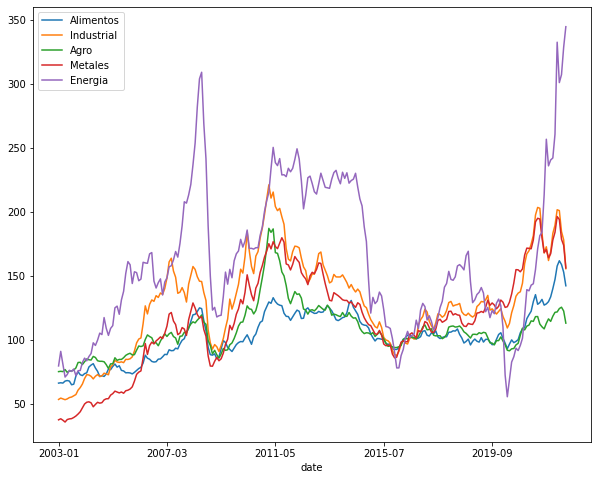

In [ ]:
# Toma el indice (representante del tiempo) como ejeX, y excluimos al promedio del ejeY.
data.plot.line(x='date', y=['Alimentos', 'Industrial', 'Agro', 'Metales', 'Energia'] , figsize=(10,8))

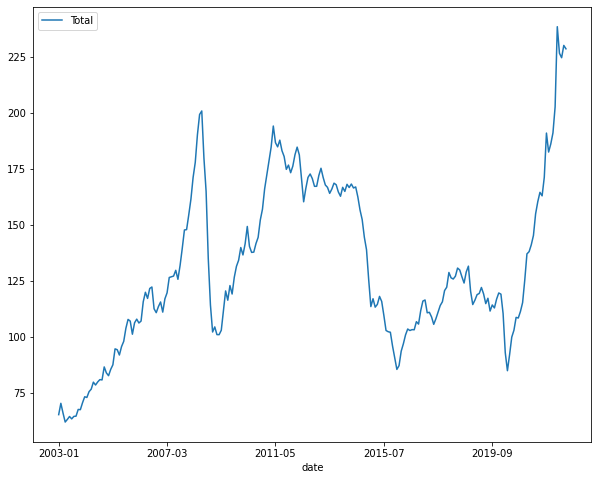

In [ ]:
# Otro solo para el promedio
data.plot.line(x='date', y='Total', figsize=(10,8))

In [ ]:
data.describe()

,Total,Alimentos,Industrial,Agro,Metales,Energia
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,130.130485,102.697206,128.956565,107.252159,115.715947,161.017515
std,37.012106,19.274624,37.452213,19.621721,38.515930,58.581315
min,61.837629,64.700086,53.010222,74.356427,35.531840,55.304616
25%,105.872829,91.776626,101.182209,95.325372,96.603975,118.203773
50%,120.608813,101.195777,128.303025,104.538553,115.873139,148.410069
75%,164.305827,117.803033,152.899555,117.527730,141.390383,213.219459
max,238.599470,161.733294,221.141627,187.061537,196.313266,344.872247


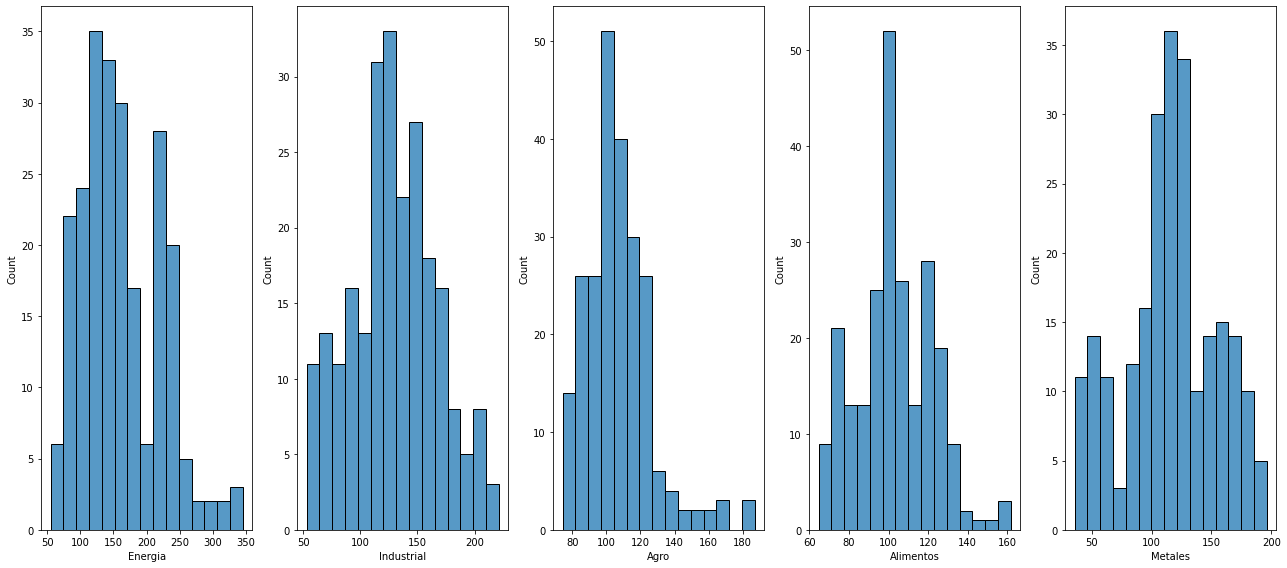

In [ ]:
variables1 = ['Energia', 'Industrial', 
             'Agro','Alimentos','Metales']

fig, axes = plt.subplots(1, len(variables1), figsize=(18,8))
for ax, variable1 in zip(axes, variables1):
    ax = sns.histplot(data[variable1],bins=15,ax=ax, palette='plasma')
plt.tight_layout()

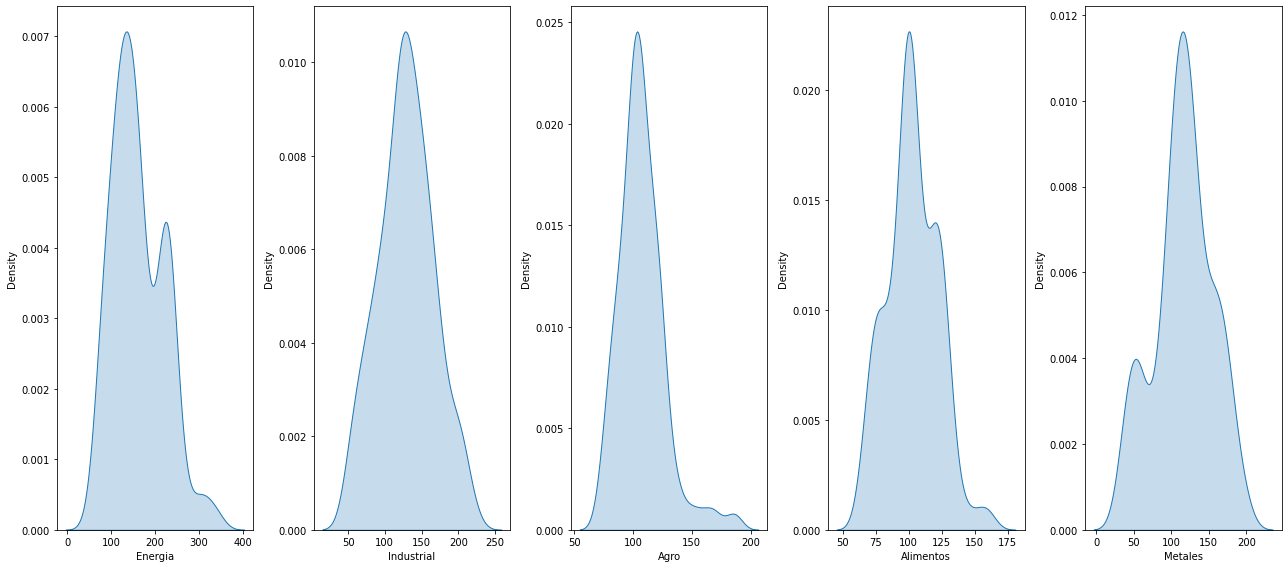

In [ ]:
variables1 = ['Energia', 'Industrial', 
             'Agro','Alimentos','Metales']

fig, axes = plt.subplots(1, len(variables1), figsize=(18,8))
for ax, variable1 in zip(axes, variables1):
    ax = sns.kdeplot(data[variable1],ax=ax,shade=True, palette='plasma')
plt.tight_layout()


Distribuciones: ¿Cómo se interpretan los gráficos de violin?

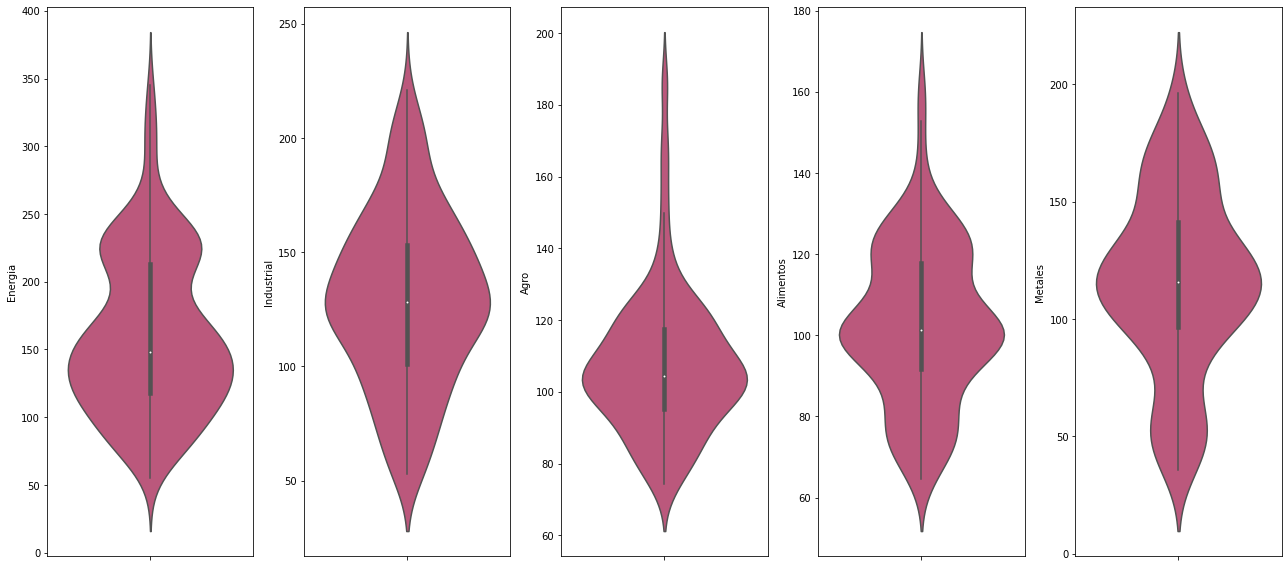

In [ ]:
variables1 = ['Energia', 'Industrial', 
             'Agro','Alimentos','Metales']

fig, axes = plt.subplots(1, len(variables1), figsize=(18,8))
for ax, variable1 in zip(axes, variables1):
    ax = sns.violinplot( y=variable1, data=data, ax=ax, palette='plasma')
plt.tight_layout()

Rta: Un diagrama de violín se utiliza para visualizar la distribución de los datos y su densidad de probabilidad. Este gráfico es una combinación de un diagrama de cajas y bigotes y un diagrama de densidad girado y colocado a cada lado, para mostrar la forma de distribución de los datos.

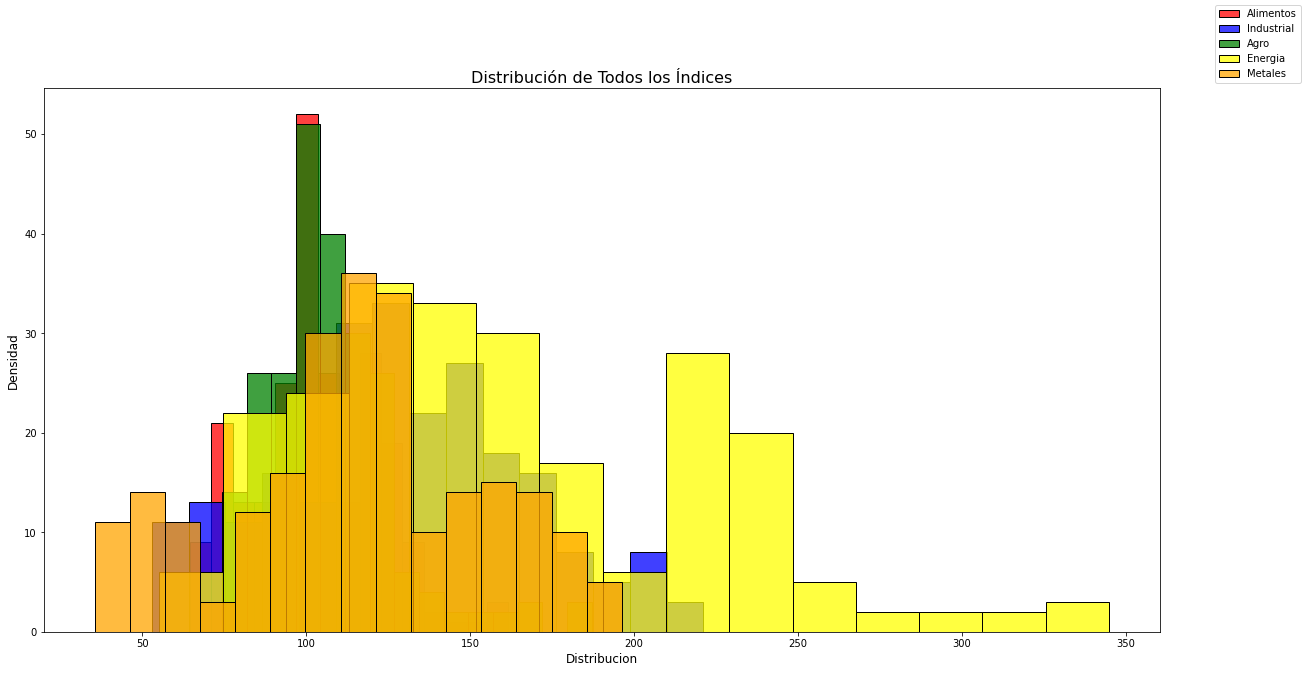

In [ ]:
# Shared graph for the distributions of the Stringency Index and Economic Support Index. 
fig = plt.figure(figsize=(20,10))
sns.histplot(data['Alimentos'], kde=False, bins=15, label='Alimentos', color='red')
sns.histplot(data['Industrial'], kde=False, bins=15, label='Industrial', color='blue')
sns.histplot(data['Agro'], kde=False, bins=15, label='Agro', color='green')
sns.histplot(data['Energia'], kde=False, bins=15, label='Energia',color='yellow')
sns.histplot(data['Metales'], kde=False, bins=15, label='Metales',color='orange')
#sns.histplot(data['Total'], kde=False, bins=15, label='total')
fig.legend()
plt.xlabel('Distribucion', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.title('Distribución de Todos los Índices', fontsize=16)
plt.show()

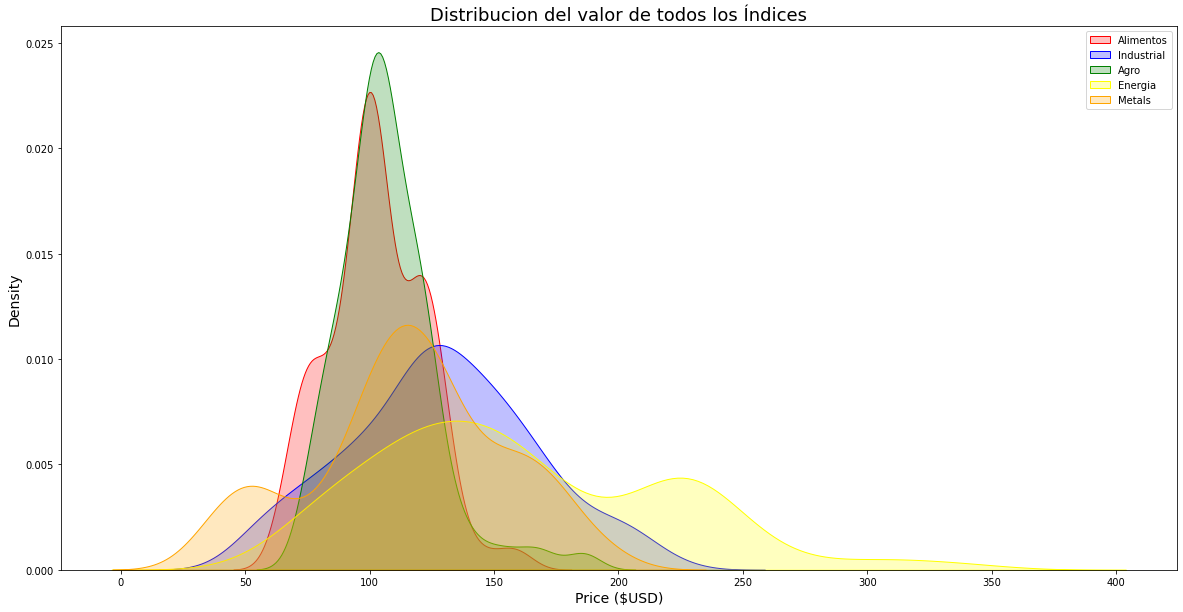

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.kdeplot(data.Alimentos, label='Alimentos', shade=True, color='red', )
sns.kdeplot(data.Industrial, label='Industrial', shade=True, color='blue')
sns.kdeplot(data.Agro, label='Agro', shade=True, color='green')
sns.kdeplot(data.Energia, label='Energia', shade=True, color='yellow')
sns.kdeplot(data.Metales, label='Metals', shade=True, color='orange')

plt.legend()
plt.title('Distribucion del valor de todos los Índices', fontsize=18)
plt.xlabel('Price ($USD)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [ ]:
CorrelacionP = data.corr()
CorrelacionP

,Total,Alimentos,Industrial,Agro,Metales,Energia
Total,1.000000,0.910192,0.873333,0.800683,0.825689,0.960458
Alimentos,0.910192,1.000000,0.844657,0.772000,0.898148,0.780405
Industrial,0.873333,0.844657,1.000000,0.876648,0.942173,0.744248
Agro,0.800683,0.772000,0.876648,1.000000,0.797403,0.699625
Metales,0.825689,0.898148,0.942173,0.797403,1.000000,0.643082
Energia,0.960458,0.780405,0.744248,0.699625,0.643082,1.000000


In [ ]:
import pandas as pd
import numpy as np

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Total,Alimentos,Industrial,Agro,Metales,Energia
Total,1.000000,0.910192,0.873333,0.800683,0.825689,0.960458
Alimentos,0.910192,1.000000,0.844657,0.772000,0.898148,0.780405
Industrial,0.873333,0.844657,1.000000,0.876648,0.942173,0.744248
Agro,0.800683,0.772000,0.876648,1.000000,0.797403,0.699625
Metales,0.825689,0.898148,0.942173,0.797403,1.000000,0.643082
Energia,0.960458,0.780405,0.744248,0.699625,0.643082,1.000000


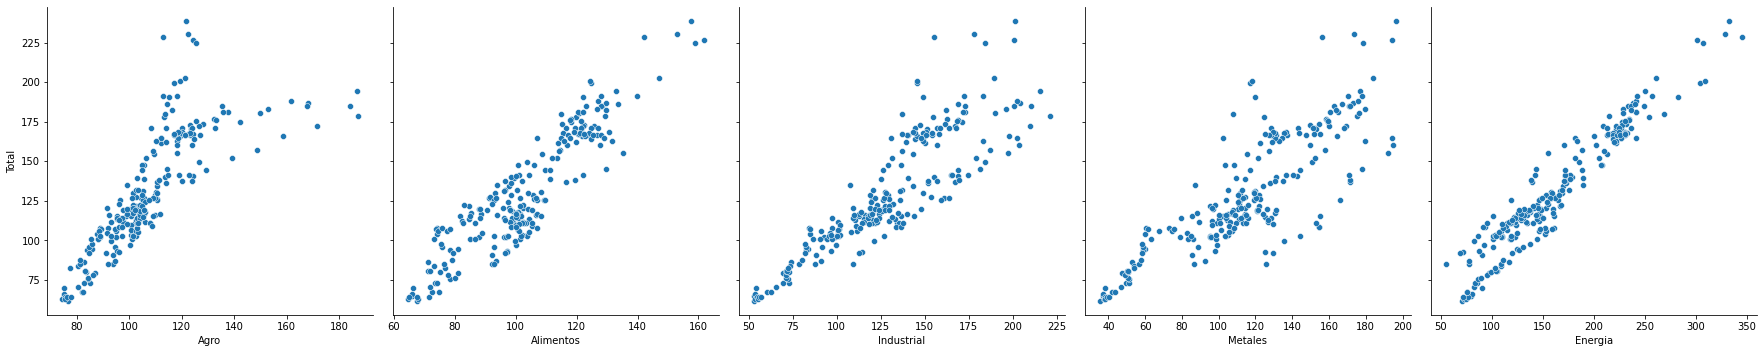

In [ ]:
g = sns.PairGrid(data, x_vars=['Agro','Alimentos','Industrial','Metales','Energia'], y_vars='Total', height=5, palette='plasma')
g.map(sns.scatterplot)

#```Actividad Propuesta 3: Calcular el primer y segundo monento de cada serie para los siguientes periodos: 2003-2007, 2008-2014, 2015-2018 y 2019 hasta la ultima fecha. ¿Existe alguna diferencia estadisticamente significativa entre las medias? ¿Por qué?. Comente sobre las varianzas de cada serie```.

#```Actividad Propuesta 4: Calcular un índice que sea el promedio simple de Alimentos, Industrial, Agro, Metales y Energia. ¿Tiene una media estadisticamente distinta al índice total? ¿Por qué?. Comente sobre las varianzas de cada serie```.

#```Actividad Propuesta 5: Incluir en la base de datos el índice de precios de los fertilizantes (PFERT). Busque la definicion de este indice en la pagina del FMI. Repita 3 y 4.```.